In [106]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge, Rectangle, Arc
from matplotlib.collections import PatchCollection
import matplotlib
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib.colors import ListedColormap

codeRepo = "/Users/krishna/PhD/WDeversion_theory/"
dataout = codeRepo + "/Simulations/analysis/plots/simple_examples/" 
os.makedirs(dataout, exist_ok=True)
plt.style.use(codeRepo + 'src/WDeversion_theory_methods/seaborn-custom-whitegrid.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
def get_isotropic_circle_subplot(ax, N = 20, zorder = 2, add_cbar = False, lambda_obj = None, add_boundary = True, boundary_lw = 1,
                          xlim = None, ylim = None,cbar_ticks = [0.5,1,1.5], fontsize = 10, cbar_name = r"$\lambda$",cmap = matplotlib.cm.RdBu_r, vmin = 0.5, vmax = 1.5,
                         ):
    #source : https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py
    #source : https://matplotlib.org/stable/gallery/shapes_and_collections/artist_reference.html#sphx-glr-gallery-shapes-and-collections-artist-reference-py
    #to control z order 
    #https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
    #add each patch separately to ax and mention its zorder

    patches = []

    R = 1
    w = R/N

    center = (0,0)

    poly_obj = lambda_obj
    radii = [(N-i)*w for i in range(N)]#[(i+1)*w for i in range(N)]
    patches = [Wedge((center), radius, 0, 360) for radius in radii] #add width = w in Wedge if you want an annulus
    colors = [poly_obj(radius) for radius in radii]

    ###########
    #colors = 100*np.random.random(len(patches))
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    p = PatchCollection(patches, cmap=cmap, norm = norm, alpha=1, edgecolor = None, zorder = zorder) #bwr #coolwarm #PuOr
    p.set_array(colors)
    ax.add_collection(p)
    if xlim is None:
        xlim = (-1.1*(R), 1.1*(R))
    ax.set_xlim(xlim)
    if ylim is None:
        ylim = (-1.1*(R), 1.1*(R))
    ax.set_ylim(ylim)
    ax.set_aspect("equal")
    ax.axis('off')
    if add_cbar: 
        cbar = plt.colorbar(p, ax = ax, ticks = cbar_ticks)
        cbar.ax.set_yticklabels(labels = [str(x_) for x_ in cbar_ticks], fontsize = fontsize)  # vertically oriented colorbar
        cbar.ax.set_ylabel(cbar_name, rotation=0, fontsize = fontsize)

    ###########
    
    if add_boundary:
        p = Arc(center, 2,2, theta1=0, theta2=360, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        ax.add_patch(p)
        
    return(ax)

def get_quiver_specs(R = 1, theta = 0, roi = "outDV", center = (0,0), stage_init ="wL3", stage_final = "4hAPF", lambda_name ="lambda_isotropic_coeffs", fit_lambdas_df = None,
                     lambda_obj = None,
                    ):
    
    #from roi, get the location
    if roi == "outDV":
        x,y = R*np.cos(theta)+center[0], R*np.sin(theta)+center[1]
    if roi == "DV":
        x,y = R,theta
    
    #from roi get the correct lambda fit poynomial
    if lambda_obj is None:
        query_str = 'stage_init == "' + stage_init + '" and stage_final == "' + stage_final + '" and roi == "' + roi + '" and prop == "'+lambda_name+'"'
        poly_obj = np.poly1d(fit_lambdas_df.query(query_str)["value"].iloc[0])
    else:
        poly_obj = lambda_obj
    #from the polynomial get the value
    lambda_val = poly_obj(np.abs(R))
    #from the value get the direction
    if roi == "outDV" and lambda_val < 1 :
        u = -np.abs(1 - lambda_val)#*np.sin(theta)
        v = np.abs(1 - lambda_val)#*np.cos(theta)
    if roi == "outDV" and lambda_val >= 1 :
        u = np.abs(1 - lambda_val)#*np.cos(theta)
        v = np.abs(1 - lambda_val)#*np.sin(theta)
    if roi == "DV" and lambda_val < 1 :
        u = 0
        v = 1#np.abs(1 - lambda_val)
    if roi == "DV" and lambda_val >= 1 :
        u = 1#np.abs(1 - lambda_val)
        v = 0
    
    return(x,y,u,v)

In [108]:

def get_quiver_specs(R = 1, theta = 0, roi = "outDV", center = (0,0), stage_init ="wL3", stage_final = "4hAPF", lambda_name ="lambda_isotropic_coeffs", fit_lambdas_df = None, lambda_obj=None):
    
    #from roi, get the location
    if roi == "outDV":
        x,y = R*np.cos(theta)+center[0], R*np.sin(theta)+center[1]
    if roi == "DV":
        x,y = R,theta
    
    #from roi get the correct lambda fit poynomial
    if lambda_obj is None:
        query_str = 'stage_init == "' + stage_init + '" and stage_final == "' + stage_final + '" and roi == "' + roi + '" and prop == "'+lambda_name+'"'
        poly_obj = np.poly1d(fit_lambdas_df.query(query_str)["value"].iloc[0])
    else:
        poly_obj = lambda_obj
    #from the polynomial get the value
    lambda_val = poly_obj(np.abs(R))
    #from the value get the direction
    if roi == "outDV" and lambda_val < 1 :
        u = -np.sin(theta)#*np.abs(1 - lambda_val)
        v = np.cos(theta)#np.abs(1 - lambda_val)
    if roi == "outDV" and lambda_val >= 1 :
        u = np.cos(theta)#*np.abs(1 - lambda_val)
        v = np.sin(theta)#*np.abs(1 - lambda_val)
    if roi == "DV" and lambda_val < 1 :
        u = 0
        v = 1#np.abs(1 - lambda_val)
    if roi == "DV" and lambda_val >= 1 :
        u = 1#np.abs(1 - lambda_val)
        v = 0
    
    return(x,y,u,v)

In [109]:
def get_nematic_circle_subplot(ax, stage_init="wL3", stage_final = "4hAPF", lambda_name ="lambda_anisotropic_coeffs", DV_width = 0.2, zorder = 10, fit_lambdas_df = None, add_boundary = True,
                        quiver_scale = 5, quiver_width = 0.005, boundary_lw = 1,
                        xlim = None, ylim = None, lambda_obj = None, roi = "outDV", dtheta = 0, thetas = None, n_theta = 10, scatter_s = 1,
                        Rs = [0.1, 0.3, 0.5, 0.7, 0.9],
                       ):
    #https://stackoverflow.com/questions/34375345/how-does-pythons-matplotlib-pyplot-quiver-exactly-work
    #dtheta = 0.1
    #Rs= np.linspace(0.1,0.9, 5)#1
    if thetas is None: thetas = np.linspace(0+dtheta, 2*np.pi-dtheta,n_theta)
    #center_bottom = (0,-DV_width/2)
    #center_top = (0,DV_width/2)
    center = (0,0)

    x = []
    y = []
    u = []
    v = []
    
    if roi == "outDV":
        for R in Rs:
            for theta in thetas:
                x_,y_,u_,v_ = get_quiver_specs(R=R, theta=theta, roi=roi, center=center, stage_init=stage_init, stage_final=stage_final, lambda_name=lambda_name, fit_lambdas_df = fit_lambdas_df,
                                               lambda_obj = lambda_obj
                                              )
                x += [x_]
                y += [y_]
                u += [u_]
                v += [v_]

    #DV
    x_DVs = np.linspace(-1,1, 10)
    y_DVs = np.linspace(-1,1, 10)
    if roi == "DV":
        for x_DV in x_DVs:
            for y_DV in y_DVs:
                if np.sqrt(x_DV**2 + y_DV**2) >= 1:
                    continue
                #pass x and y values as R and theta
                x_,y_,u_,v_ = get_quiver_specs(R=x_DV, theta=y_DV, roi=roi, center=center, stage_init=stage_init, stage_final=stage_final, lambda_name=lambda_name, fit_lambdas_df = fit_lambdas_df,
                                               lambda_obj = lambda_obj
                                              )
                x += [x_]
                y += [y_]
                u += [u_]
                v += [v_]

    #add quivers
    ax.quiver(x,y,u,v, scale = quiver_scale, headwidth = 0, headlength = 0, headaxislength = 0, width = quiver_width, pivot = "mid", zorder = zorder) #increase scale value to decrease length of lines
    ax.scatter(x,y,s = scatter_s, color = "black")

    if add_boundary:
        p = Arc(center, 2,2, theta1=0, theta2=360, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        ax.add_patch(p)
        #p = Arc(center_top, 2,2, theta1=0, theta2=180, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        #ax.add_patch(p)
        #p = Rectangle((-1,center_bottom[1]), 2, DV_width, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        #ax.add_patch(p)

    ax.set_aspect("equal")
    R = 1
    if xlim is None:
        xlim = (-1.1*(R+DV_width), 1.1*(R+DV_width))
    ax.set_xlim(xlim)
    if ylim is None:
        ylim = (-1.1*(R+DV_width), 1.1*(R+DV_width))
    ax.set_ylim(ylim)
    ax.axis('off')

    return(ax)


## Test plot

%matplotlib inline
Large_font_size = 12
Medium_font_size = 7
Small_font_size = 5
lw = 0.5
text_kwargs = dict(ha='center', va='center', color='C1')

#setting figuresize - by default matplotlib uses inches
#size of A4 sheet - 
cm_ = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(figsize=(3*cm_, 2*cm_))
#ax.text(0.5, 1.5, f'Max font : {Large_font_size}pt', fontsize = Large_font_size, **text_kwargs)
#ax.text(0.5, 1.0, f'Med font : {Medium_font_size}pt', fontsize = Medium_font_size, **text_kwargs)
#ax.text(0.5, 0.5, f'Small font : {Small_font_size}pt', fontsize = Small_font_size, **text_kwargs)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel(r"$K_b^*$", fontsize = Medium_font_size, rotation = 0)
ax.set_xlabel("g", fontsize = Medium_font_size)

#os.makedirs("plots", exist_ok=True)

fig.savefig(dataout + "test.pdf", bbox_inches = "tight")

In [110]:

#setting colorbar
cmap_isotropic = sns.diverging_palette(210, 30, s=100, l=65, as_cmap=True)
cmap_anisotropic = sns.diverging_palette(145,300, s=60, as_cmap=True)
#other plotting specifications
Large_font_size = 12
Medium_font_size = 7
Small_font_size = 5
lw = 1.2
text_kwargs = dict(ha='center', va='center', color='C1')
#setting figuresize - by default matplotlib uses inches
#size of A4 sheet - 
cm_ = 1/2.54  # centimeters in inches 
#set figsize like this - figsize=(3*cm_, 2*cm_)
#settings for quivers
quiver_scale=15
quiver_width=0.01
DV_width = np.sin(0.1931/2)/np.sin(0.8662) #around 0.1
#circ_plot_xlim = (-1.25,1.25)
#circ_plot_ylim = (-1.1, 1.4)
vmax = 1.5
vmin = 0.5

# Plot colorbars

N = 256
vals = np.ones((N, 4))
#orange - 255, 153, 51
vals[:, 0] = np.linspace(1,255/256,N) 
vals[:, 1] = np.linspace(1,153/256,N)
vals[:, 2] = np.linspace(1,51/256,N)
#to invert the color map, do np.linspace(255/256,1,N) and same for all the rest of the lines
cmap_isotropic = ListedColormap(vals)
#cmap_isotropic

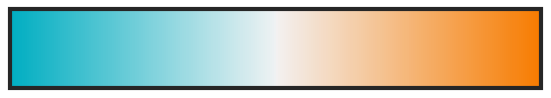

In [111]:

#fig,ax = plt.subplots()
fig = plt.figure(figsize = (15*cm_, 20*cm_))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
#cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', ticks=[], cmap='RdBu') #
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='horizontal', ticks=[], cmap=cmap_isotropic) #
cb.outline.set_linewidth(3)
cb.set_alpha(1)
#plt.savefig('plots/colorbar_isotropic.pdf', bbox_inches='tight')

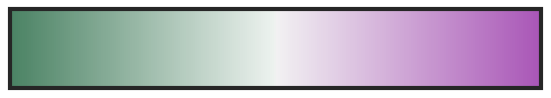

In [112]:
#cmap_anisotropic = sns.diverging_palette(145,300, s=60, as_cmap=True)

#colorbar
fig = plt.figure(figsize = (15*cm_, 20*cm_))
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
#cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', ticks=[], cmap='RdBu') #
cb = matplotlib.colorbar.ColorbarBase(ax, orientation='horizontal', ticks=[], cmap=cmap_anisotropic) #
cb.outline.set_linewidth(3)
#plt.savefig('plots/colorbar_anisotropic.pdf', bbox_inches='tight')

## Homogeneous isotropic surface 

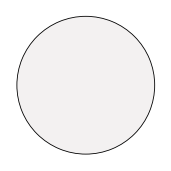

In [113]:
lambda_obj = np.poly1d([0,1])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_isotropic,vmin = vmin, vmax = vmax)
#fig.savefig("plots/inhomogeneous_isotropic_surface_no_gradient.pdf", bbox_inches = "tight")

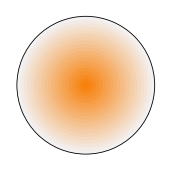

In [114]:
lambda_obj = np.poly1d([-0.5,1.5])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)
ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_isotropic, vmin = vmin, vmax = vmax)
#fig.savefig("plots/inhomogeneous_isotropic_surface_gradient_in.pdf", bbox_inches = "tight")
plt.savefig(dataout + "/inhomogeneous_isotropic_surface_gradient_in.pdf", bbox_inches = "tight")

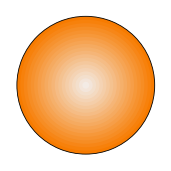

In [115]:
lambda_obj = np.poly1d([0.5,1])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_isotropic, vmin = vmin, vmax = vmax)
fig.savefig(dataout + "/inhomogeneous_isotropic_surface_gradient_out.pdf", bbox_inches = "tight")


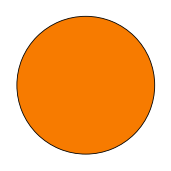

In [116]:
lambda_obj = np.poly1d([1.5])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_isotropic, vmin = vmin, vmax = vmax)
fig.savefig(dataout + "/homogeneous_isotropic_surface.pdf", bbox_inches = "tight")

## Tangential elongation

In [117]:
quiver_scale = 20
quiver_width = 0.01
vmin = 0.5 
vmax = 1.5

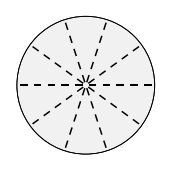

In [118]:
lambda_obj = np.poly1d([0, 1])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

thetas = np.arange(0,2*np.pi,2*np.pi/(10))
ax = get_nematic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, roi = "outDV", thetas = thetas,
                                quiver_scale = quiver_scale, quiver_width = quiver_width,
                               )
ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_anisotropic, vmin = vmin, vmax = vmax)
#fig.savefig("plots/tangential_elongation_no_elongation.pdf", bbox_inches = "tight")

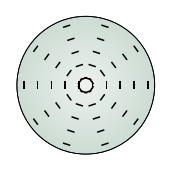

In [119]:
lambda_obj = np.poly1d([-0.1, 1])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

thetas = np.arange(0,2*np.pi,2*np.pi/(10))
ax = get_nematic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, roi = "outDV", thetas = thetas,
                                quiver_scale = quiver_scale, quiver_width = quiver_width,
                               )
ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_anisotropic, vmin = vmin, vmax = vmax)
fig.savefig(dataout+"tangential_elongation_gradient_out.pdf", bbox_inches = "tight")

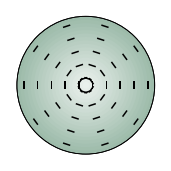

In [120]:
lambda_obj = np.poly1d([-0.25, 1])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

thetas = np.arange(0,2*np.pi,2*np.pi/(10))
ax = get_nematic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, roi = "outDV", thetas = thetas,
                                quiver_scale = quiver_scale, quiver_width = quiver_width,
                               )
cmap  = sns.diverging_palette(145, 300, s=60, as_cmap=True) #matplotlib.cm.PuOr
ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_anisotropic, vmin = vmin, vmax = vmax)
fig.savefig(dataout + "tangential_elongation_gradient_out_stronger.pdf", bbox_inches = "tight")

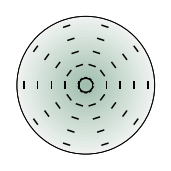

In [121]:
lambda_obj = np.poly1d([0.25, 0.75])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)


thetas = np.arange(0,2*np.pi,2*np.pi/(10))
ax = get_nematic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, roi = "outDV", thetas = thetas,
                                quiver_scale = quiver_scale, quiver_width = quiver_width,
                               )
cmap  = sns.diverging_palette(145, 300, s=60, as_cmap=True) #matplotlib.cm.PuOr
ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_anisotropic, vmin = vmin, vmax = vmax)
fig.savefig(dataout + "tangential_elongation_gradient_in_stronger.pdf", bbox_inches = "tight")

## Radial elongation

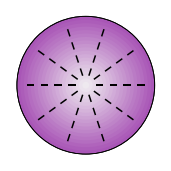

In [122]:
lambda_obj = np.poly1d([0.5, 1])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)


thetas = np.arange(0,2*np.pi,2*np.pi/(10))
ax = get_nematic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, roi = "outDV", thetas = thetas,
                                quiver_scale = quiver_scale, quiver_width = quiver_width, Rs = [0.2, 0.4, 0.6, 0.8]
                               )
ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_anisotropic, vmin = vmin, vmax = vmax)
fig.savefig(dataout+"radial_elongation_radially_increasing.pdf", bbox_inches = "tight")

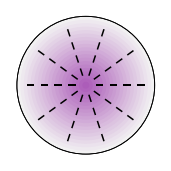

In [123]:
lambda_obj = np.poly1d([-0.5, 1.5])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)


thetas = np.arange(0,2*np.pi,2*np.pi/(10))
ax = get_nematic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, roi = "outDV", thetas = thetas,
                                quiver_scale = quiver_scale, quiver_width = quiver_width, Rs = [0.2, 0.4, 0.6, 0.8]
                               )
ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_anisotropic, vmin = vmin, vmax = vmax)
fig.savefig(dataout+"radial_elongation_radially_decreasing.pdf", bbox_inches = "tight")

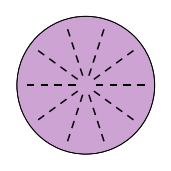

In [124]:
lambda_obj = np.poly1d([0, 1.25])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)


thetas = np.arange(0,2*np.pi,2*np.pi/(10))
ax = get_nematic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, roi = "outDV", thetas = thetas,
                                quiver_scale = quiver_scale, quiver_width = quiver_width, Rs = [0.2, 0.4, 0.6, 0.8]
                               )
ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_anisotropic, vmin = vmin, vmax = vmax)
fig.savefig(dataout+"radial_elongation_radially_constant.pdf", bbox_inches = "tight")

## homogeneous alongDV elongation

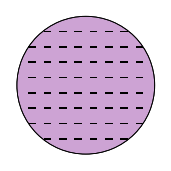

In [125]:
lambda_obj = np.poly1d([0, 1.25])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)


thetas = np.arange(0,2*np.pi,2*np.pi/(10))
ax = get_nematic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, roi = "DV", #thetas = thetas,
                                quiver_scale = quiver_scale, quiver_width = quiver_width,
                               )
ax = get_isotropic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, add_cbar=False, fontsize = Medium_font_size, cmap = cmap_anisotropic, vmin = vmin, vmax = vmax)
fig.savefig(dataout+"elongation_along_DV_constant.pdf", bbox_inches = "tight")

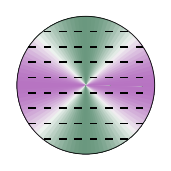

In [165]:
#
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)

thetas = np.arange(0,2*np.pi,2*np.pi/(10))
ax = get_nematic_circle_subplot(ax, lambda_obj=lambda_obj, boundary_lw=lw/2, roi = "DV", #thetas = thetas,
                                quiver_scale = quiver_scale, quiver_width = quiver_width,
                               )

N = 100
thetas = np.linspace(0,360, N)
dtheta = 360/N
patches = [Wedge((0,0), 1, theta-dtheta/2, 360-dtheta/2) for theta in thetas]
m = 1.25
colors = np.cos(2*thetas*np.pi/180)
vmin = -m
vmax = m
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
p = PatchCollection(patches, cmap=cmap_anisotropic, norm = norm, alpha=1, edgecolor = None, zorder = 2,) #bwr #coolwarm #PuOr
p.set_array(colors)
ax.add_collection(p)

ax.set_aspect("equal")
ax.set_xlim((-1.1,1.1))
ax.set_ylim((-1.1,1.1))
ax.axis('off')

fig.savefig(dataout+"elongation_along_DV_constant_color_consistent.pdf", bbox_inches="tight")

In [ ]:
#plot a section of a circle
lambda_obj = np.poly1d([0, 1.25])
figsize = (8*cm_, 5*cm_)
fig,ax = plt.subplots(figsize = figsize)


In [ ]:
def get_isotropic_circle_subplot_azimuthal(ax, N = 20, zorder = 2, add_cbar = False, lambda_obj = None, add_boundary = True, boundary_lw = 1,
                          xlim = None, ylim = None,cbar_ticks = [0.5,1,1.5], fontsize = 10, cbar_name = r"$\lambda$",cmap = matplotlib.cm.RdBu_r, vmin = 0.5, vmax = 1.5,
                         ):
    #source : https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py
    #source : https://matplotlib.org/stable/gallery/shapes_and_collections/artist_reference.html#sphx-glr-gallery-shapes-and-collections-artist-reference-py
    #to control z order 
    #https://matplotlib.org/stable/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
    #add each patch separately to ax and mention its zorder

    patches = []

    Theta = 2*np.pi #R = 1
    w = Theta/N

    center = (0,0)

    poly_obj = lambda_obj
    thetas = [(N-i)*w for i in range(N)]#[(i+1)*w for i in range(N)]
    patches = get sections #[Wedge((center), radius, 0, 360) for radius in radii] #add width = w in Wedge if you want an annulus
    colors = [poly_obj(theta) for theta in thetas]

    ###########
    #colors = 100*np.random.random(len(patches))
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    p = PatchCollection(patches, cmap=cmap, norm = norm, alpha=1, edgecolor = None, zorder = zorder) #bwr #coolwarm #PuOr
    p.set_array(colors)
    ax.add_collection(p)
    if xlim is None:
        xlim = (-1.1*(R), 1.1*(R))
    ax.set_xlim(xlim)
    if ylim is None:
        ylim = (-1.1*(R), 1.1*(R))
    ax.set_ylim(ylim)
    ax.set_aspect("equal")
    ax.axis('off')
    if add_cbar: 
        cbar = plt.colorbar(p, ax = ax, ticks = cbar_ticks)
        cbar.ax.set_yticklabels(labels = [str(x_) for x_ in cbar_ticks], fontsize = fontsize)  # vertically oriented colorbar
        cbar.ax.set_ylabel(cbar_name, rotation=0, fontsize = fontsize)

    ###########
    
    if add_boundary:
        p = Arc(center, 2,2, theta1=0, theta2=360, linewidth=boundary_lw, zorder=zorder,fill = False,edgecolor="black")
        ax.add_patch(p)
        
    return(ax)

(-1.1, 1.1)

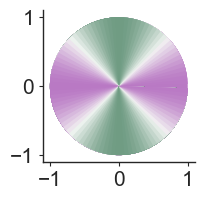

In [158]:
fig,ax = plt.subplots(figsize = figsize)
N = 100
thetas = np.linspace(0,360, N)
dtheta = 360/N
patches = [Wedge((0,0), 1, theta-dtheta/2, 360-dtheta/2) for theta in thetas]
c_array, s_array = np.round(np.abs(np.cos(thetas*np.pi/180)),2), np.round(np.abs(np.sin(thetas*np.pi/180)),2)
m = 1.3
# [c*m if c > s else 1/(s*m) for c, s in zip(c_array, s_array)]
colors = np.cos(2*thetas*np.pi/180)
cmap = cmap_anisotropic
vmin = -1*m
vmax = 1*m
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
p = PatchCollection(patches, cmap=cmap, norm = norm, alpha=1, edgecolor = None, zorder = 2,) #bwr #coolwarm #PuOr
p.set_array(colors)
ax.add_collection(p)
ax.set_aspect("equal")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

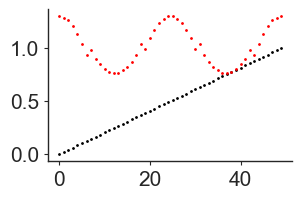

In [154]:
x = np.arange(len(thetas))
y = thetas/np.max(thetas)
fig,ax = plt.subplots(figsize = figsize)
ax.scatter(x,y, s = 1, color = "black")

y = colors
ax.scatter(x,y, s = 1, color = "red")


In [150]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(-1.1, 1.1)

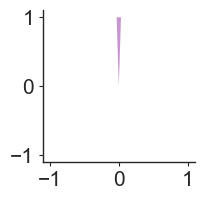

In [139]:
fig, ax = plt.subplots(figsize = figsize)
patches = [Wedge((0,0), 1, 90-dtheta/2, 90+dtheta/2) ]
colors = [m]
cmap = cmap_anisotropic
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
p = PatchCollection(patches, cmap=cmap, norm = norm, alpha=1, edgecolor = None, zorder = 2,) #bwr #coolwarm #PuOr
p.set_array(colors)
ax.add_collection(p)
ax.set_aspect("equal")
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)